In [2]:
from scipy.cluster.vq import vq, kmeans, whiten

## 1. Dominant colors in images
In the final chapter of this course, let us try to use clustering on real world problems. In this first video, we will analyze images to determine dominant colors.

#### Dominant colors in images
Any image consists of pixels, each pixel represents a dot in the image. 
- A `pixel` consists of three values - each value is a number between 0-255, representing the amount of its red, green and blue components.
- The `combination` of these forms the actual color of the pixel. 

To find the dominant colors, we will perform `k-means clustering`, with its `RGB components`. 

One important use of k-means clustering on images is to `segment satellite images` to **identify surface features**.

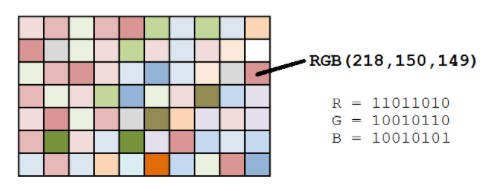

In [3]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)
Image(r"../input/cluster-images/cluster_chap4_fig1a.jpg", width = 450)

#### Feature identification in satellite images
In this satellite image, you can see the terrain of a river valley. Various colors typically belong to different features. K-means clustering can be used to cluster them into groups, which can then be identified into various surface features like water and vegetation.

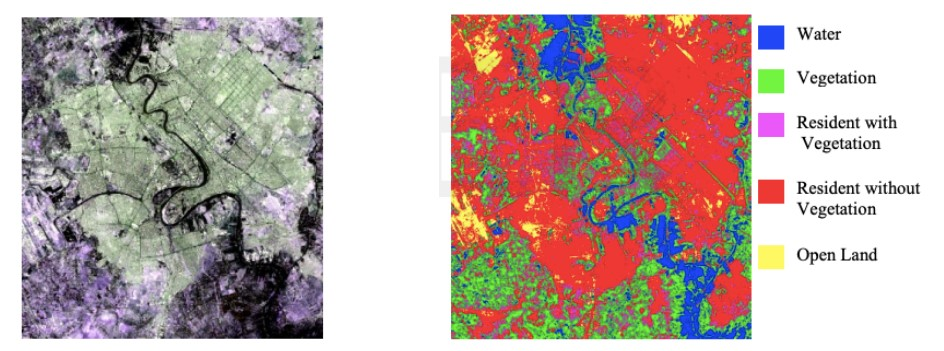

In [4]:
## Hình minh họa Image(fig1, height, width)

#### Tools to find dominant colors
There are 2 additional methods that you will be introduced to in this section, which are a part of the image class of matplotlib. 
- The first one is the `imread method`, which converts a `JPEG image` into a matrix, which contains the RGB values of each pixel. 
- The second method is the `imshow method` which would display colors of the cluster centers once you perform k-means clustering on the RGB values.

#### Test image
In this section, let us perform k-means clustering on this image of the sea. Notice that there are two dominant colors in the image - a blue-green color of the sea water, and a light blue sky.

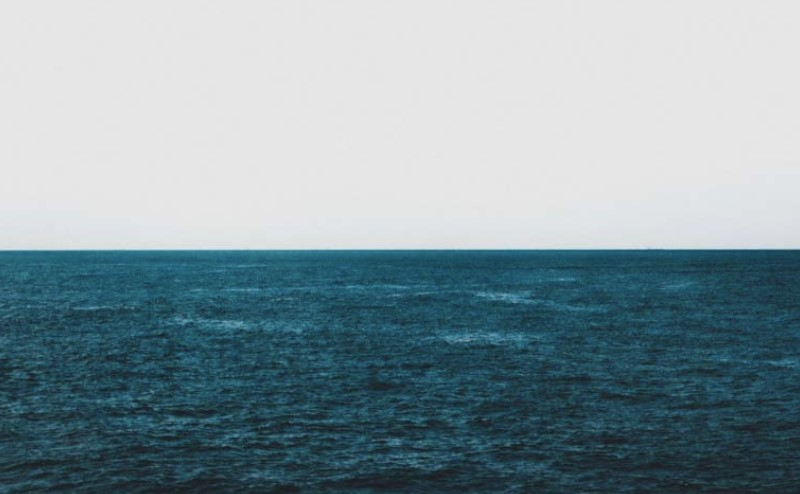

In [5]:
## Hình minh họa Image(fig1, height, width)

#### Convert image to RGB matrix
The first step in the process is to convert the image to pixels using the imread method of the image class. 
- Notice that the output of this function is a `MxNx3 matrix`, where `M` and `N` are the dimensions of the image.

In [6]:
import matplotlib.image as img

image = img.imread(sea_image)
image.shape

(494, 800, 3)

- In this analysis, we are going to collectively look at all pixels, and their position would not matter, hence, we will just extract all RGB values and store them in their corresponding lists.

In [7]:
red = []
blue = []
green = []

for row in image:
    for pixel in row:
        r, g, b = pixel
        red.append(r)
        blue.append(b)
        green.append(g)

#### Data frame with RGB values
Once the lists are created, we store them in a Pandas data frame.

In [8]:
import pandas as pd
pixels = pd.DataFrame({'red': red, 'green': green, 'blue': blue})
pixels.head()

,red,green,blue
0,230,230,230
1,230,230,230
2,230,230,230
3,230,230,230
4,230,230,230


#### Create an elbow plot
Here is the code to create an elbow plot from the [last chapter](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Machine%20Learning/Clustering%20%26%20Segmentation/Cluster%20Analysis/K-Means%20Clustering.ipynb).

In [9]:
pixels[['scaled_red', 'scaled_green', 'scaled_blue']] = whiten(pixels)

distortions = []
nb_clusters = range(1, 11)

for nb in nb_clusters:
    cluster_centers, _ = kmeans(pixels[['scaled_red', 'scaled_green', 'scaled_blue']], nb)
    distortions.append(_)
elbow_plot = pd.DataFrame({'num_clusters': nb_clusters, 'distortions': distortions})

#### Elbow plot
Once we scale the RGB values of the list of pixels, we create the elbow plot to see how many dominant colors are present in the image.

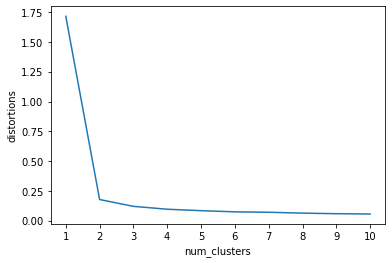

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x = 'num_clusters', y = 'distortions', data = elbow_plot)
plt.xticks(nb_clusters)
plt.show()

Notice that the elbow plot indicates two clusters, which supports our initial observation of two prominent colors in the image.

In [11]:
cluster_centers, _ = kmeans(pixels[['scaled_red', 'scaled_green', 'scaled_blue']], 2)

#### Find dominant colors
The cluster centers obtained are standardized `RGB values`.

Recall that a standardized value of a variable is its actual value divided by the standard deviation.

We would display the colors through the imshow method, which takes RGB values that have been scaled to the range of 0 to 1. To do so, we need to multiply the standardized values of the cluster centers with their corresponding standard deviations. 

We saw earlier that actual RGB values take the maximum value of 255, hence we divide it by 255 to get a scaled value in the range of 0-1.

In [12]:
colors = []

# find the std
r_std, g_std, b_std = pixels[['red', 'green', 'blue']].std()

# scale actual RGB values to 0-1
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((scaled_r * r_std / 255,
                   scaled_g * g_std / 255,
                   scaled_b * b_std / 255
                  ))

#### Display dominant colors
Once we have the colors with their RGB values, the imshow method is used to display them. 
- Note that you need to provide the colors variable encapsulated as a list, as the imshow method expects a `MxNx3 matrix` to display a `2D grid` of colors. 

In [13]:
print('Dimension 2x3: \n', colors)
print('Dimension 1x2x3: \n', [colors])

Dimension 2x3: 
 [(0.13639315819831893, 0.28363044669442167, 0.33696138086537614), (0.8942365233468096, 0.8978813842664113, 0.8998424554219523)]
Dimension 1x2x3: 
 [[(0.13639315819831893, 0.28363044669442167, 0.33696138086537614), (0.8942365233468096, 0.8978813842664113, 0.8998424554219523)]]


- By doing this, we are providing a `1xNx3 matrix`, which tells `imshow method` to display only one row of colors, where N is the number of clusters. 

Here are the two dominant colors, which supports our preliminary observations.

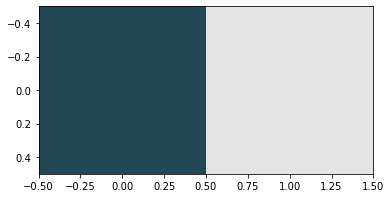

In [14]:
plt.imshow([colors])
plt.show()

### 1.2. PRACTICES
#### Exercise 1.2.1. Extract RGB values from image
There are broadly three steps to find the dominant colors in an image:

- Extract RGB values into three lists.
- Perform k-means clustering on scaled RGB values.
- Display the colors of cluster centers.
To extract RGB values, we use the `imread() function` of the image class of matplotlib. Empty lists, r, g and b have been initialized.

For the purpose of finding dominant colors, we will be using the following image.
#### SOLUTION.
- Step 1. Read & display image

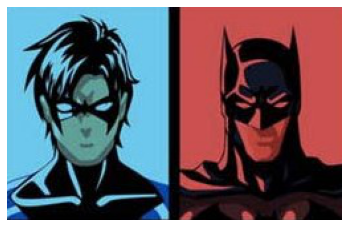

In [15]:
batman_file = r"../input/cluster-images/cluster_chap4_fig1c.jpg"

# Read batman image
batman_image = img.imread(batman_file)
batman_image = batman_image[10:-10, 10:-10]

# display
plt.imshow(batman_image)
plt.axis("off")
plt.show()

- Step 2. Print dimensions then store RGB values of all pixels in lists r, g and b

In [16]:
print(batman_image.shape)

r = []
g = []
b = []
# Store RGB values of all pixels in lists r, g and b
for pixel in batman_image:
    for temp_r, temp_g, temp_b in pixel:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(161, 253, 3)


#### Exercise 1.2.2. How many dominant colors?
We have loaded the following image using the `imread() function` of the image class of `matplotlib`.

The RGB values are stored in a data frame, batman_df. The RGB values have been standardized used the `whiten() function`, stored in columns, scaled_red, scaled_blue and scaled_green.

Construct an elbow plot with the data frame. How many dominant colors are present?
#### SOLUTION.

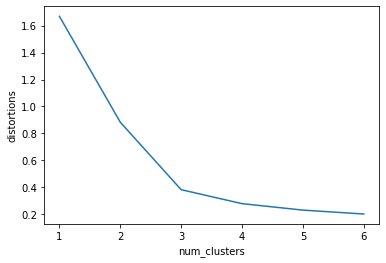

In [17]:
distortions = []
num_clusters = range(1, 7)

batman_df = pd.DataFrame({'red': r, 'blue': b, 'green': g})
batman_df[['scaled_red', 'scaled_blue', 'scaled_green']] = whiten(batman_df)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

**Comments.** Notice that there are three distinct colors present in the image, which is supported by the elbow plot.

#### Exercise 1.2.3. Display dominant colors
We have loaded the following image using the `imread()` function of the image class of `matplotlib`.

To display the dominant colors, convert the colors of the cluster centers to their raw values and then converted them to the range of 0-1, using the following formula: 

            converted_pixel = standardized_pixel * pixel_std / 255
The RGB values are stored in a data frame, `batman_df`. The scaled RGB values are stored in columns, `scaled_red`, `scaled_blue` and `scaled_green`.

The cluster centers are stored in the variable `cluster_centers`, which were generated using the `kmeans()` function with three clusters.
#### SOLUTION

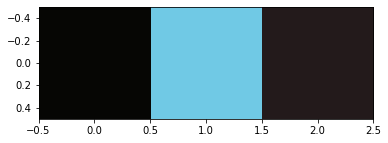

In [18]:
colors = []

# Replace number_clusters = 3
cluster_center, _ = kmeans(batman_df[['scaled_red', 'scaled_green', 'scaled_blue']], 3)

# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
                    scaled_r * r_std / 255,
                    scaled_g * g_std / 255,
                    scaled_b * b_std / 255
                   ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

## 2. Document clustering
### 2.1. Theory.
In the introductory lesson, we discussed about the use of unsupervised learning techniques to group news items together by a service such as Google News. This technique, which is known as document clustering, will be explored in this video.

#### Document clustering: concepts
Document clustering uses some concepts from natural language processing, or NLP. Although NLP is a huge subject, let us try and understand its basics to apply in this use case. 
- First, we will *clean the data* for anything that does not add value to our analysis. Some items to *remove include punctuation, emoticons and words such as "the, is, are"*.
- Next we find the TF-IDF of the terms, or a weighted statistic that describes the *importance of a term in a document*. 
- Finally, we `cluster the TF-IDF matrix` and display the top terms in each cluster.

#### Clean and tokenize data
The text in itself cannot be analyzed before converting into smaller parts called tokens, which we achieve by using NLTK's word_tokenize method. 
- First, we remove all special characters from tokens and check if it contains to any stop words. 
- Finally, we return the cleaned tokens. 

Here's the output of sample quote from the movie Pink Panther.

In [19]:
from nltk.tokenize import word_tokenize
import re

def remove_noise(text, stop_words = []):
    tokens = word_tokenize(text)
    cleaned_token = []
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            cleaned_token.append(token.lower())
            
    return cleaned_token

print(remove_noise("It is lovely weather we are having. I hope the weather continues."))

['it', 'is', 'lovely', 'weather', 'we', 'are', 'having', 'hope', 'the', 'weather', 'continues']


#### Document term matrix and sparse matrices
Once relevant terms have been extracted, a matrix is formed, with the terms and documents as dimensions. An element of the matrix signifies how many times a term has occurred in each document. 

Most elements are zeros, hence, sparse matrices are used to store these matrices more efficiently. A sparse matrix only contains terms which have non zero elements.

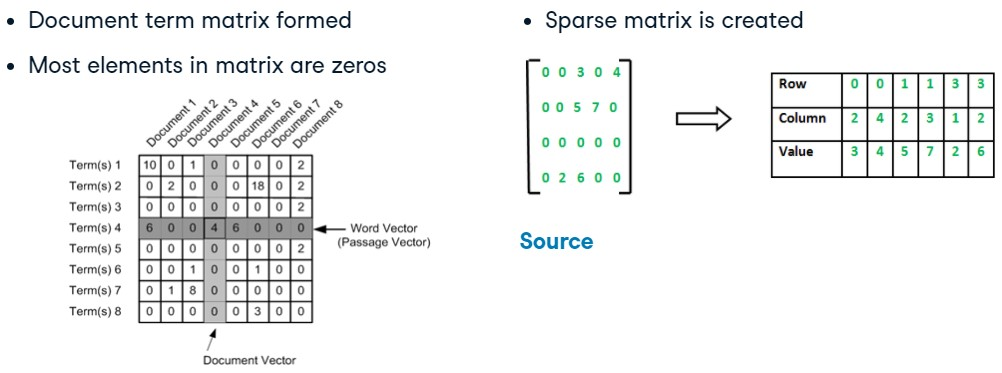

In [20]:
## Hình minh họa Image(fig1, height, width)

#### TF-IDF (Term Frequency - Inverse Document Frequency)
To find the TF-IDF of terms in a group of documents, we use the TfidfVectorizer class of sklearn. 
- We initialize it with the following features: max_df and min_df signify the maximum and minimum fraction of documents a word should occur in - here we go ahead with terms that appear in more than 20% but less than 80% documents. We keep the top 50 terms.
- Finally, we use our custom function as a tokenizer. The fit_transform method creates the TF-IDF matrix for the data, which is a sparse matrix.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer(max_df = 0.8, min_df =0.2, max_features = 50, tokenizer = remove_noise)

#### Clustering with sparse matrix
`kmeans` in `scipy` does not work with sparse matrices, so we convert the tfidf matrix to its expanded form using the todense method. kmeans can then be applied to get the cluster centers. We do not use the elbow plot, as it will take an erratic form due to the high number of variables.

In [22]:
tf_matrix = tf_vec.fit_transform(data)

#### Top terms per cluster
Each cluster center is a list of tfidf weights, which signifies the importance of each term in the matrix. To find the top terms, we first create a list of all terms. Then, we create a dictionary with the terms are keys and tfidf as values. We then sort the dictionary by its values in descending order and display top terms. Zip method joins two lists in python. We analyze a list of 1000 hotel reviews to find that the top terms in one of the clusters were room, hotel, and staff, whereas the other cluster, had bad, location, and breakfast as the top terms.

#### More considerations
Due to the scope of the course, we have seen a simple form of document clustering. There are more considerations when it comes to NLP. For instance, you can modify the remove_noise method to filter hyperlinks, or replace emoticons with text. You can normalize every word to its base form: for instance, run, ran and running are the forms of the same verb run. Further, the todense method may not work with large datasets, and you may need to consider an implementation of k-means that works with sparse matrices.

### 2.2. PRACTICES
#### Exercise 2.2.1. TF-IDF of movie plots
Let us use the plots of randomly selected movies to perform document clustering on. Before performing clustering on documents, they need to be cleaned of any unwanted noise (such as special characters and stop words) and converted into a sparse matrix through TF-IDF of the documents.

Use the TfidfVectorizer class to perform the TF-IDF of movie plots stored in the list plots. The remove_noise() function is available to use as a tokenizer in the TfidfVectorizer class.

The .fit_transform() method fits the data into the TfidfVectorizer objects and then generates the TF-IDF sparse matrix.
#### SOLUTION.

In [24]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.75, max_features = 50, tokenizer = remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

#### Exercise 2.2.2. Top terms in movie clusters
Now that you have created a sparse matrix, generate cluster centers and print the top three terms in each cluster. Use the .todense() method to convert the sparse matrix, tfidf_matrix to a normal matrix for the kmeans() function to process. Then, use the .get_feature_names() method to get a list of terms in the tfidf_vectorizer object. The zip() function in Python joins two lists.

The tfidf_vectorizer object and sparse matrix, tfidf_matrix, from the previous have been retained in this exercise. kmeans has been imported from SciPy.

With a higher number of data points, the clusters formed would be defined more clearly. However, this requires some computational power, making it difficult to accomplish in an exercise here.
#### SOLUTION.

In [26]:
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

['him', 'they', 'an']
['her', 'she', 'him']


## 3. Clustering with multiple features
In the final video exercise of the course, let us perform clustering on the FIFA dataset again. However, this time we will consider more than two variables and try to interpret and validate the results of clustering.
### 3.1. Theory
#### Basic checks
While it is important to understand that all features can not be visualized and assessed at the same time when clustering with more than 3 features, we will discuss a few techniques to validate your results. This step assumes that you have created the elbow plot, performed the clustering process and generated cluster labels. 

In [37]:
fifa = pd.read_csv(r"../input/cluster-dataset/fifa_18_sample_data.csv")
scaled_features = ['scaled_heading_accuracy', 'scaled_volleys', 'scaled_finishing']
fifa[scaled_features] = whiten(fifa[['heading_accuracy','volleys', 'finishing']])
cluster_centers, distortion = kmeans(fifa[scaled_features], 2)
fifa['cluster_labels'], distortion_list = vq(fifa[scaled_features], cluster_centers)

First, you can check how the cluster centers vary with respect to the overall data. If you notice that cluster centers of some features do not vary significantly with respect to the overall data, perhaps, it is an indication that you can drop that feature in the next run.

In [34]:
fifa.groupby('cluster_labels')[].mean()

,scaled_heading_accuracy,scaled_volleys,scaled_finishing
cluster_labels,,,
0,3.208366,2.832726,2.764816
1,0.710196,0.639003,0.579890


Next, you can also look at the sizes of the clusters formed. If one or more clusters are significantly smaller than the rest, you may want to double if their cluster centers are similar to other clusters. If the answer is yes, you may want to reduce the number of clusters in subsequent runs.

In [36]:
fifa.groupby('cluster_labels')[['ID']].count()

,ID
cluster_labels,
0,886
1,114


 In this case, you notice that the second cluster is significantly smaller. It is because we have performed clustering on three attacking attributes, for which goalkeepers have a very low value as indicated by the cluster centers. Hence, the smaller cluster is composed primarily of goalkeepers, as we will explore later.

#### Visualizations
Even though all variables cannot be visualized across clusters, there are other simpler visualizations that help you understand the results of clustering. You may either visualize cluster centers or other variables stacked against each other. 

In pandas, you can use the plot method after groupby to generate such plots. In this example, the bar chart is demonstrated. You can also create a line chart to see how variables vary across clusters. In our case, you will notice that all three attributes are significantly higher in one cluster.

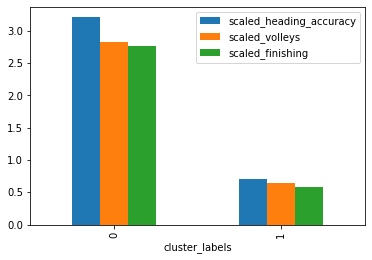

In [38]:
fifa.groupby('cluster_labels')[scaled_features].mean().plot(kind = 'bar')
plt.show()

#### Top items in clusters
Finally, let us check five players from each cluster. 

As expected the first cluster has top attack minded players like Ronaldo, Messi and Neymar. As explained earlier, the second cluster has top goalkeepers like Manuel Neuer, De Gea and Buffon, who have very low values for traits like volleys and heading accuracy. This determines that our clustering was appropriate.


In [43]:
for cluster in fifa['cluster_labels'].unique():
    print('Cluster_label', cluster, ':', fifa[fifa['cluster_labels'] == cluster]['name'].values[: 5])

Cluster_label 0 : ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'R. Lewandowski']
Cluster_label 1 : ['M. Neuer' 'De Gea' 'T. Courtois' 'G. Buffon' 'J. Oblak']


#### Feature reduction
When dealing with a large number of features, certain techniques of feature reduction may be used. Two popular tools to reduce the number of features are 
- Factor analysis and 
- Multidimensional scaling. 

Although these are beyond the scope of this course, you may consider them as a precursor to clustering.

### 3.2. PRACTICES
#### Exercise 3.2.1 Clustering with many features
What should you do if you have too many features for clustering?
>- A. Visualize all the features
>- B. Reduce features using a technique like Factor Analysis
>- C. Perform hierarchical clustering

#### Answers
>- A. Wrong! It may prove to be too difficult to visualize *more than three features at a time*.
>- **B. Correct!** We should **explore steps to reduce the number of features**.
>- C. Incorrect! With increasing complexity, it may take *too much time to perform the analysis*.

#### Exercise 3.2.2. Basic checks on clusters
In the FIFA 18 dataset, we have concentrated on defenders in previous exercises. Let us try to focus on attacking attributes of a player. 
- Pace (pac), 
- Dribbling (dri) and 
- Shooting (sho) 

are features that are present in attack minded players. 

In this exercise, k-means clustering has already been applied on the data using the scaled values of these three attributes. Try some basic checks on the clusters so formed.

The data is stored in a Pandas data frame, `fifa`. 

The scaled column names are present in a list scaled_features. The cluster labels are stored in the `cluster_labels` column. Recall the `.count()` and `.mean() methods` in Pandas help you find the number of observations and mean of observations in a data frame.
#### SOLUTION.

In [45]:
# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())

cluster_labels
0    886
1    114
Name: ID, dtype: int64
cluster_labels
0    71843.115124
1    50692.982456
Name: eur_wage, dtype: float64


**Comments.** The cluster sizes are not very different, and there are no significant differences that can be seen in the wages. Further analysis is required to validate these clusters.

#### Exercise 3.2.3. what makes a complete player?
The overall level of a player in FIFA 18 is defined by six characteristics: pace (pac), shooting (sho), passing (pas), dribbling (dri), defending (def), physical (phy).

In [48]:
features = ['pac', 'sho', 'pas', 'dri', 'def', 'phy']
scaled_features = ['scaled_pac', 'scaled_sho', 'scaled_pas', 'scaled_dri', 'scaled_def', 'scaled_phy']
fifa[scaled_features] = whiten(fifa[features])

(1000, 195)

In this exercise, you will use all six characteristics to create clusters. The data for this exercise is stored in a Pandas dataframe, `fifa`. features is the list of these column names and `scaled_features` is the list of columns which contains their scaled values. The following have been pre-loaded: `kmeans`, `vq` from `scipy.cluster.vq`,` matplotlib.pyplot as plt`, `seaborn as sns`.

#### SOLUTION.

                scaled_pac  scaled_sho  scaled_pas  scaled_dri  scaled_def  \
cluster_labels                                                               
0                 5.454041    3.668379    7.174064    6.767575    3.966702   
1                 6.684070    5.430915    8.455704    8.514977    2.500552   

                scaled_phy  
cluster_labels              
0                 9.209874  
1                 8.334066  


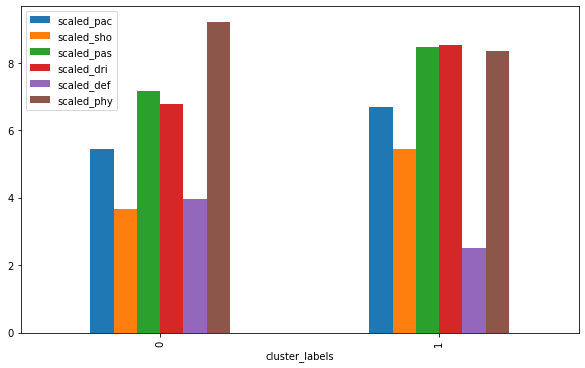

1 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
0 ['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín']


In [52]:
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fig, ax = plt.subplots(figsize = (10, 6))
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar', ax = ax)
plt.show()

# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])

**Comments.** The data was sorted before you performed the clustering. Notice the top players in each cluster are representative of the overall characteristics of the cluster - one of the clusters primarily represents attackers, whereas the other represents defenders. 

Surprisingly, a top goalkeeper `Manuel Neuer` is seen in the attackers group, but he is known for going out of the box and participating in open play, which are reflected in his FIFA 18 attributes.